In [80]:
import numpy as np
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Проверка на пустые данные

In [82]:
print("Пустые значения")
print("AGE: ", df['Age'].isna().sum())
print("CABIN: ",df['Cabin'].isna().sum())
print("PASSENGER_ID: ",df['PassengerId'].isna().sum())
print("PARCH: ",df['Parch'].isna().sum())
print("SEX: ",df['Sex'].isna().sum())
print("FARE: ",df['Fare'].isna().sum())
print("SURVIVED: ",df['Survived'].isna().sum())
print("PCLASS: ",df['Pclass'].isna().sum())
print("SIBSB: ",df['SibSp'].isna().sum())
print("Ticket: ",df['Ticket'].isna().sum())
print("EMBARKED: ",df['Embarked'].isna().sum())
print("NAME: ",df['Name'].isna().sum())

Пустые значения
AGE:  177
CABIN:  687
PASSENGER_ID:  0
PARCH:  0
SEX:  0
FARE:  0
SURVIVED:  0
PCLASS:  0
SIBSB:  0
Ticket:  0
EMBARKED:  2
NAME:  0


Замена пустых значений возраста средним возрастом

In [83]:
mean_age = df["Age"].mean()
df.fillna({'Age': mean_age}, inplace=True)

Распределение поссажиров по полу

In [84]:
df.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

Распределение выживших пассажиров по полу

In [85]:
df[df['Survived'] == 1].groupby('Sex')['PassengerId'].count()

Sex
female    233
male      109
Name: PassengerId, dtype: int64

Всего пассажиров

In [86]:
total = len(df)
total

891

Выживших пассажиров

In [87]:
survived = len(df[df['Survived'] == 1])
survived

342

Выживших пассажиров, %

In [88]:
np.mean(df['Survived'])*100

38.38383838383838

Средний возраст пассажиров

In [89]:
np.mean(df['Age'])

29.69911764705882

Средний возраст выживших пассажиров

In [90]:
np.mean(df[df['Survived'] == 1]['Age'])

28.549778121775027

Средний возраст выживших пассажиров 1,2,3 класса

In [91]:
age1 = df[(df['Survived'] == 1) & (df['Pclass'] == 1)]['Age']
age2 = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]['Age']
age3 = df[(df['Survived'] == 1) & (df['Pclass'] == 3)]['Age']
(np.mean(age1), np.mean(age2), np.mean(age3))

(34.78461505190312, 26.0761663286004, 23.232689075630248)

Процент выживших пассажиров 1,2,3 класса

In [92]:
(np.mean(df[df['Pclass'] == 1]['Survived'])*100,
np.mean(df[df['Pclass'] == 2]['Survived'])*100,
np.mean(df[df['Pclass'] == 3]['Survived'])*100)

(62.96296296296296, 47.28260869565217, 24.236252545824847)

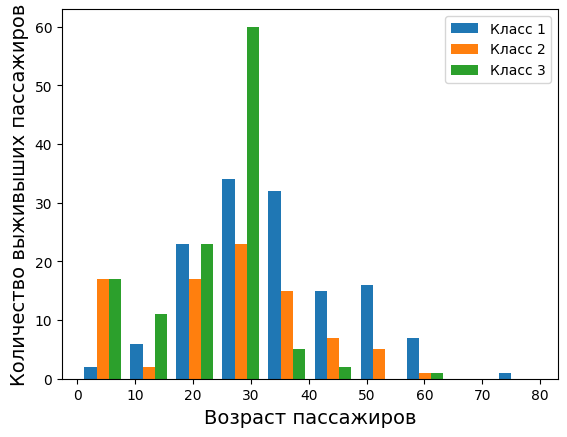

In [93]:
import matplotlib.pyplot as plt
plt.hist([age1, age2, age3])
plt.legend(["Класс 1","Класс 2", "Класс 3"])
plt.xlabel("Возраст пассажиров", fontsize=14)  
plt.ylabel("Количество выживыших пассажиров", fontsize=14)
plt.show()

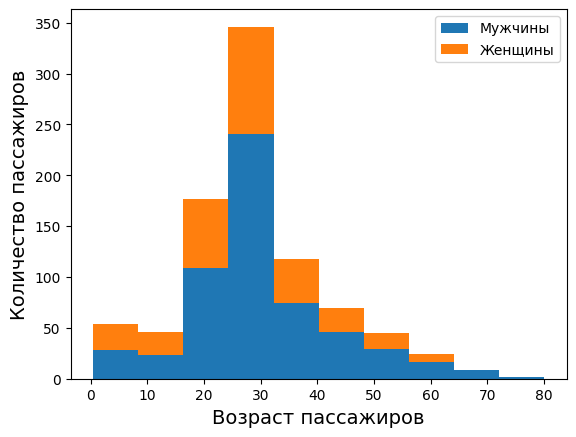

In [97]:
male = df[df['Sex'] == 'male']['Age']
female = df[df['Sex'] == 'female']['Age']

plt.hist([male, female], stacked=True)
plt.legend(["Мужчины","Женщины"])
plt.xlabel("Возраст пассажиров", fontsize=14)  
plt.ylabel("Количество пассажиров", fontsize=14)
plt.show()

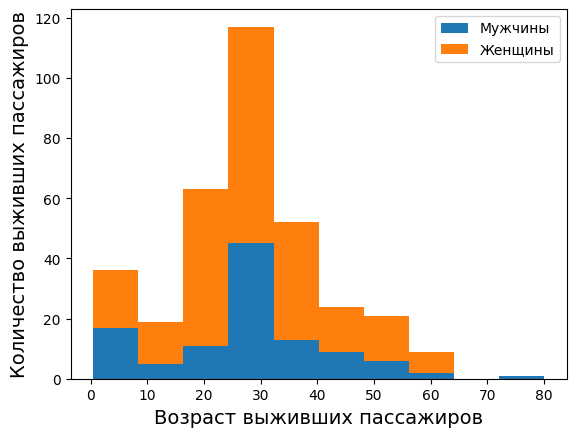

In [96]:
male = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]['Age']
female = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Age']

plt.hist([male, female], stacked=True)
plt.legend(["Мужчины","Женщины"])
plt.xlabel("Возраст выживших пассажиров", fontsize=14)  
plt.ylabel("Количество выживших пассажиров", fontsize=14)
plt.show()